
## GeostatsPy: Spatial Bayesian Updating for Subsurface Data Analytics in Python 


### Michael Pyrcz, Professor, The University of Texas at Austin 

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


Here's a workflows for multivariate integration with spatial data updating. This should help you get started with building subsurface models that include mulitple information sources. 

#### Gaussian Assumption

This method is based on the multivariate Gaussian assumption. Therefore all variables are first transformed to standard normal and are then assumed to be multiGaussian. This assumption may be practically 'checked' for reasonableness with matrix scatter plots. Of course, this is not a completely rigorous manner to check for multiGaussian, nor is the univariate transform sufficient to ensure multiGaussian multivariate distributions. 

#### Local Prior Distribution by Simple Kriging with Well Data

The distribution of uncertainty for the primary variable is predicted from spatial estimation based on surrounding data using simple kriging. These estimates are called prior distributions and are denoted as *prior*.  Similar to the likelihood distribution, the parameters of the prior distribution are obtained from the normal equation, but with correlations representing the closeness and redundancy of primary data at other spatial locations.

The correlation coefficients between all primary data at different locations come directly from a variogram or correlogram\index{correlogram} model. The prior distributions are summarized by a set of mean and variance values for all locations and primary variables (under the assumption of Gaussianity):

\begin{equation}
\overline{y}_{prior,p}(\bf{u}),\sigma^2_{prior,p}(\bf{u}) \quad  p=1,\ldots,N_p, \quad \forall \bf{u} \in AOI
\end{equation}

These distributions summarize the spatial information of surrounding data of the same variable type. 

#### Local  Likelihood Distribution from Merged Secondary Data

All secondary variables are merged into a single likelihood distribution for with respect to the primary variable at each location.  Of course, the number of secondary variables available at each location could vary; the notation $N_{S}({\bf u})$ denotes the number of secondary data available at location $\bf{u}$.

The mean and variance of the likelihood distribution are calculated directly from the normal equations. 

* **redundancy**, **closeness** and **spatial correlation** are captured with the normal equations (kriging).   

* the correlations of the secondary data with themselves are on the left hand side and the correlation of each secondary variable with the primary variable is on the right hand side.

* the correlation coefficients between all pairs of secondary data and all secondary and primary data are required.  

* these should be calculated from the Gaussian transformed primary and secondary data.  

* the likelihood distributions (denoted as *like*) are summarized by a set of mean and variance values for all locations:

\begin{equation}
\overline{y}_{like}(\bf{u}), \, \sigma^2_{like}(\bf{u}); \forall \bf{u} \in AOI 
\end{equation}

* these distributions are a 'collapsed' version of all available secondary variables at location $\bf{u}$.  The final likelihood distributions account for the correlations and redundancy between the secondary variables and correlation between the secondary data and the primary variable of interest.

* the resulting weights can become unstable and non-intuitive, recognized as large positive or negative weights. 

* sequential removal of the most redundant secondary variable or the secondary variable least correlated with the primary variable may improve stability of the system  

* metric to measure the importance of each secondary variable for sensitivity analysis and also to ensure that important variables are not removed   

* sequentially remove variables and calculate the importance metric based on the change in the kriging variance.

\begin{equation}
Importance = \frac{\sigma^{2}_{k,i} - \sigma^{2}_{k}}{\sigma^{2}_{k}}
\end{equation}

where $i$ is the variable removed, $\sigma^{2}_{k,i}$is the kriging variance for that configuration, and $\sigma^{2}_{k}$ is the kriging variance when all variables are considered.  

* this relation was developed with the premise that the more a variable contributes to reducing the kriging variance, the more important it is.  

* to gain insight into the mutual interactions of all secondary variables the full combinatorial is explored.

#### Bayesian Updating for Local Posterior 

Since the prior and likelihood distributions are Gaussian, the resulting updated distribution will also be Gaussian. The updated distribution is defined by the updated mean and variance, $\overline{y}_{updated}(\bf{u})$ and $\sigma^{2}_{updated}(\bf{u})$ respectively.  

\begin{equation}
\hspace{-0.1cm}\overline{x}_{updated} =
\frac{\overline{x}_{likelihood}(\bf{u}) \cdot \sigma^2_{prior} (\bf{u}) + \overline{x}_{prior}(\bf{u})
\cdot \sigma^2_{likelihood} (\bf{u})}{[1 - \sigma^2_{likelihood}(\bf{u})][\sigma^2_{prior}(\bf{u}) - 1] + 1}
\end{equation}

and the variance for the updated distribution is:

\begin{equation}
\sigma^2_{updated}(\bf{u}) =
\frac{{\sigma^2}_{prior}(\bf{u})~{\sigma^2}_{likelihood}(\bf{u})}{[1 - {\sigma^2}_{likelihood}(\bf{u})][{\sigma^2}_{prior}(\bf{u}) -1] + 1}
\end{equation}

where $\overline{x}$ and $\sigma^2$ are the mean and variance for each distribution.

The updated distributions defined above must be back-transformed to return the primary variables to their original distributions.   

* Markov screening assumption is made whereby collocated secondary data screen the influence of nearby secondary data. 

* percentiles, or arbitrary number of quantiles, could be back-transformed from the local updated distributions for each primary variable.  

* any summary statistics of the local distributions could then be calculated including the expected value, the local variance, P10, P50 and P90 values and so on. These summaries could be used to characterize local uncertainty and to assist with well placement and data collection decisions. 

Local uncertainty in each of the $N_{k}$ variables at each location $\forall {\bf{u}} \in AOI$ does not permit multivariate calculations or uncertainty over larger volumes.  The local uncertainty models are for each location and each primary variable separately.  

* A simulation approach is required to provide a joint uncertainty model accounting for multivariate and spatial relationships.  

For this exercise we will keep it simple with a single secondary variable, it is straightforward to expand to multiple secondary variables.

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - [spatial_nonlinear_MV_facies_v5.csv](https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/spatial_nonlinear_MV_facies_v5.csv) with porosity, permeability, acoustic impedance.
* Gridded data - [spatial_nonlinear_MV_facies_v5_sand_only_truth_AI.csv](https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/spatial_nonlinear_MV_facies_v5_sand_only_truth_AI.csv) 2D exhaustive map of acoustic impedence

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        

ModuleNotFoundError: No module named 'tqdm'

We will also need some standard packages. These should have been installed with Anaconda 3.

In [3]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import math                               # trig etc.
import scipy.signal as signal             # kernel for moving window calculation

I was missing some GSLIB methods so I coded them up for this workflow.  I include them here for now, but I will add them to GeostatsPy shortly.

In [4]:
# These functions were coded here to testing, I will add to GeostatsPy and update this workflow soon.
def gcum(x):
    z = x
    if z < 0: 
        z = -z
    t  = 1./(1.+ 0.2316419*z)
    gcum = t*(0.31938153   + t*(-0.356563782 + t*(1.781477937 + t*(-1.821255978 + t*1.330274429))))
    e2   = 0.
#  6 standard deviations out gets treated as infinity:
    if z <= 6.: 
        e2 = np.exp(-z*z/2.)*0.3989422803
    gcum = 1.0- e2 * gcum
    if x >= 0:
        return gcum
    gcum = 1.0 - gcum
    return gcum

def locate(xx,iis,iie,x):
    n = len(xx)
# Initialize lower and upper methods:
    if iis <= 0: 
        iis = 0
    if iie >= n:
        iie = n-1
    jl = iis-1
    ju = iie
    if xx[n-1] <= x:
        j = iie
        return j
# If we are not done then compute a midpoint:
    while (ju-jl) > 1: 
        jm = int((ju+jl)/2)
# Replace the lower or upper limit with the midpoint:
        if (xx[iie] > xx[iis]) == (x > xx[jm]):
            jl = jm
        else:
            ju = jm
# Return with the array index:
    j = jl
    return j

def powint(xlow,xhigh,ylow,yhigh,xval,power):
    EPSLON=1.0e-20
    if (xhigh-xlow) < EPSLON:
        powint = (yhigh+ylow)/2.0
    else:
        powint = ylow + (yhigh-ylow)*(((xval-xlow)/(xhigh-xlow))**power)
    return powint

def backtr(df,vcol,vr,vrg,zmin,zmax,ltail,ltpar,utail,utpar):   
    EPSLON=1.0e-20
    nd = len(df); nt = len(vr) # number of data to transform and number of data in table
    backtr = np.zeros(nd)
    vrgs = df[vcol].values
# Value in the lower tail?    1=linear, 2=power, (3 and 4 are invalid):
    for id in range(0,nd):
        if vrgs[id] <= vrg[0]:
            backtr[id] = vr[0]
            cdflo  = gcum(vrg[0])
            cdfbt  = gcum(vrgs[id])
            if ltail == 1:
                backtr[id] = powint(0.0,cdflo,zmin,vr[0],cdfbt,1.0)
            elif ltail == 2:
                cpow   = 1.0 / ltpar
                backtr[id] = powint(0.0,cdflo,zmin,vr[0],cdfbt,cpow)
# Value in the upper tail?     1=linear, 2=power, 4=hyperbolic:
        elif vrgs[id] >= vrg[nt-1]:
            backtr[id] = vr[nt-1]
            cdfhi  = gcum(vrg[nt-1])
            cdfbt  = gcum(vrgs[id])
            if utail == 1:
                backtr[id] = powint(cdfhi,1.0,vr[nt-1],zmax,cdfbt,1.0)
            elif utail == 2: 
                cpow   = 1.0 / utpar
                backtr[id] = powint(cdfhi,1.0,vr[nt-1],zmax,cdfbt,cpow)
            elif utail == 4:
                plambda = (vr[nt-1]**utpar)*(1.0-gcum(vrg[nt-1]))
                backtr[id] = (plambda/(1.0-gcum(vrgs)))**(1.0/utpar)
        else:
# Value within the transformation table:
            j = locate(vrg,1,nt,vrgs[id])
            j = max(min((nt-2),j),1)
            backtr[id] = powint(vrg[j],vrg[j+1],vr[j],vr[j+1],vrgs[id],1.0)
    return backtr

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [5]:
#os.chdir("c:/PGE383")             # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

In [25]:
df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/spatial_nonlinear_MV_facies_v5_sand_only.csv')     # load our data table 
df = df.rename(columns={'Por':'Porosity'})

It worked, we loaded our file into our DataFrame called 'df'. But how do you really know that it worked? Visualizing the DataFrame would be useful and we already learned about these methods in this demo (https://git.io/fNgRW). 

We can preview the DataFrame by printing a slice or by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). With the slice we could look at any subset of the data table and with the head command, add parameter 'n=13' to see the first 13 rows of the dataset.  

In [26]:
df.head(n=13)                           # we could also use this command for a table preview

,Unnamed: 0,X,Y,Porosity,Perm,AI,Facies
0,2902,290.0,869.0,19.918960,230.034307,3872.084994,0.0
1,1853,140.0,779.0,23.181930,436.280432,3635.918413,0.0
2,4407,180.0,619.0,16.879564,76.425825,4044.697940,0.0
3,3200,480.0,19.0,14.563102,106.760754,4449.654955,0.0
4,3534,130.0,809.0,21.566379,618.936205,3734.979848,0.0
5,322,190.0,849.0,24.778736,624.221076,3768.824533,0.0
6,345,70.0,889.0,21.589076,193.929149,3583.617970,0.0
7,4077,750.0,949.0,13.203654,569.083334,4187.214495,0.0
8,543,90.0,749.0,21.635481,54.455978,3802.521842,0.0
9,3649,80.0,889.0,27.004396,17.813989,3610.072235,0.0


#### Summary Statistics for Tabular Data

The table includes X and Y coordinates (meters), Facies 1 and 2 (1 is sandstone and 0 interbedded sand and mudstone), Porosity (fraction), and permeability as Perm (mDarcy). 

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [27]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,270.0,2461.325926,1507.826244,18.000000,1139.000000,2393.500000,3745.000000,4955.000000
X,270.0,348.481481,274.005314,0.000000,125.000000,270.000000,550.000000,980.000000
Y,270.0,571.111111,337.911015,9.000000,234.000000,669.000000,886.500000,999.000000
Porosity,270.0,18.381488,4.262747,9.224354,14.866536,18.629858,21.723391,27.594892
Perm,270.0,513.340334,310.213322,0.000000,287.343802,494.810838,728.374673,1458.288193
AI,270.0,3952.045158,260.243630,3549.859605,3736.619686,3935.496559,4128.857755,4708.782401
Facies,270.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Visualizing Tabular Data with Location Maps 

It is natural to set the x and y coordinate and feature ranges manually. e.g. do you want your color bar to go from 0.05887 to 0.24230 exactly? Also, let's pick a color map for display. I heard that plasma is known to be friendly to the color blind as the color and intensity vary together (hope I got that right, it was an interesting Twitter conversation started by Matt Hall from Agile if I recall correctly). We will assume a study area of 0 to 1,000m in x and y and omit any data outside this area.

In [62]:
xmin = 0.0; xmax = 1000.0              # range of x values
ymin = 0.0; ymax = 1000.0              # range of y values
pormin = 8.0; pormax = 28.0;           # range of porosity values
AImin = 3000.0; AImax = 5000.0         # range of acoustic impedance
nx = 100; ny = 100; csize = 10.0
cmap = plt.cm.inferno                  # color map

Let's try out locmap. This is a reimplementation of GSLIB's locmap program that uses matplotlib. I hope you find it simpler than matplotlib, if you want to get more advanced and build custom plots lock at the source. If you improve it, send me the new code. Any help is appreciated. To see the parameters, just type the command name:

In [63]:
GSLIB.locmap

<function geostatspy.GSLIB.locmap(df, xcol, ycol, vcol, xmin, xmax, ymin, ymax, vmin, vmax, title, xlabel, ylabel, vlabel, cmap, fig_name)>

Now we can populate the plotting parameters and visualize the porosity data.

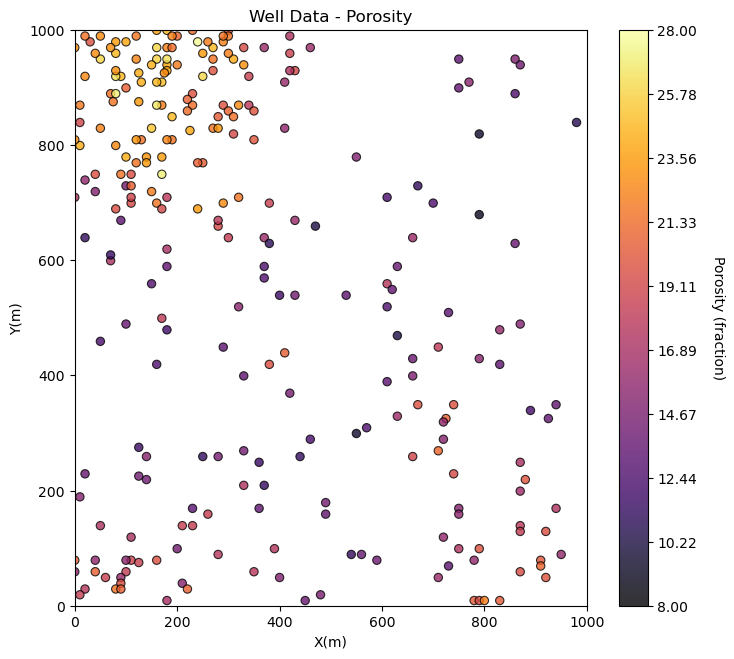

In [64]:
plt.subplot(111)
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

Looks like we loaded the tabular data alright.

#### Loading Gridded Data

Let's load and visualize the seismic data set.

In [65]:
seismic = np.loadtxt('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/spatial_nonlinear_MV_facies_v5_sand_only_truth_AI.csv', delimiter=',')

#### Visualizing Gridded Data

We have a 100 in y and 100 in x grid but we need more information. What is the origin, units, orientation and the cell size? This file format does not include that information so I'll give it to you. It is the same for any of the datasets that I prepared for this course. The cell size is 10m isotropic and grid goes from 0 to 1000m in x and y (origin is at 0,0 and the orientation is alligned with x and y (Eastings and Northings, no rotation).

In [66]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
gcsize = 10.0;                          # grid cell size

We will use the pixelplt command reimplimented form GSLIB. 

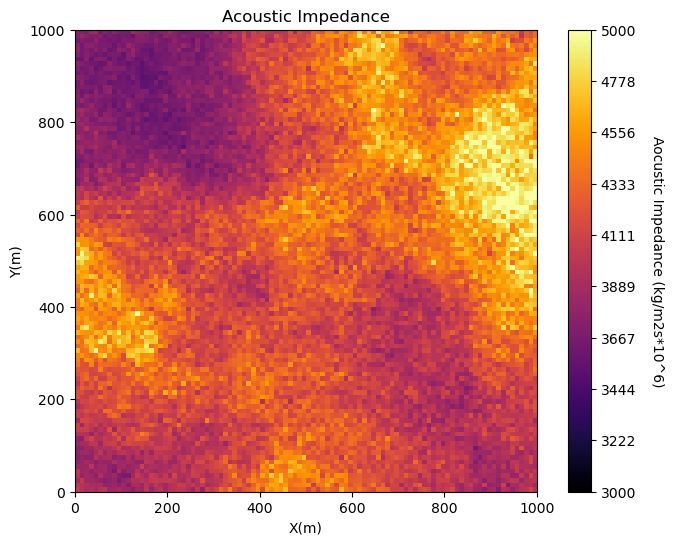

In [67]:
GSLIB.pixelplt(seismic,xmin,xmax,ymin,ymax,gcsize,AImin,AImax,'Acoustic Impedance','X(m)','Y(m)','Aocustic Impedance (kg/m2s*10^6)',cmap,'pixelplot_Acoustic_Impedance')

#### Transform All Variables to Normal Score

We will transform the data table porosity and acoustic impedance, along with the gridded acoustic impedance data to standard normal.   

In [68]:
df['NPor'], tvPor, tnsPor = geostats.nscore(df, 'Porosity') # nscore transform for all facies porosity 
df['NAI'], tvAI, tnsAI = geostats.nscore(df, 'AI')  # nscore transform for all acoustic impedance

Let's look at the updated DataFrame to make sure that we now have the normal score porosity and acoustic impedance.

In [69]:
df.head()

,Unnamed: 0,X,Y,Porosity,Perm,AI,Facies,NPor,NAI
0,2902,290.0,869.0,19.918960,230.034307,3872.084994,0.0,0.267754,-0.135024
1,1853,140.0,779.0,23.181930,436.280432,3635.918413,0.0,1.102210,-1.433021
2,4407,180.0,619.0,16.879564,76.425825,4044.697940,0.0,-0.296738,0.405398
3,3200,480.0,19.0,14.563102,106.760754,4449.654955,0.0,-0.697987,1.721362
4,3534,130.0,809.0,21.566379,618.936205,3734.979848,0.0,0.572968,-0.686191


That looks good! One way to check is to see if the relative magnitudes of the normal score transformed values match the original values.  e.g. that the normal score transform of 0.10 porosity normal score is less than the normal score transform of 0.14 porsity.  Also, the normal score transform of values close to the mean value should be close to 0.0 

Let's also check the original and transformed porosity and acoustic impedence distributions.

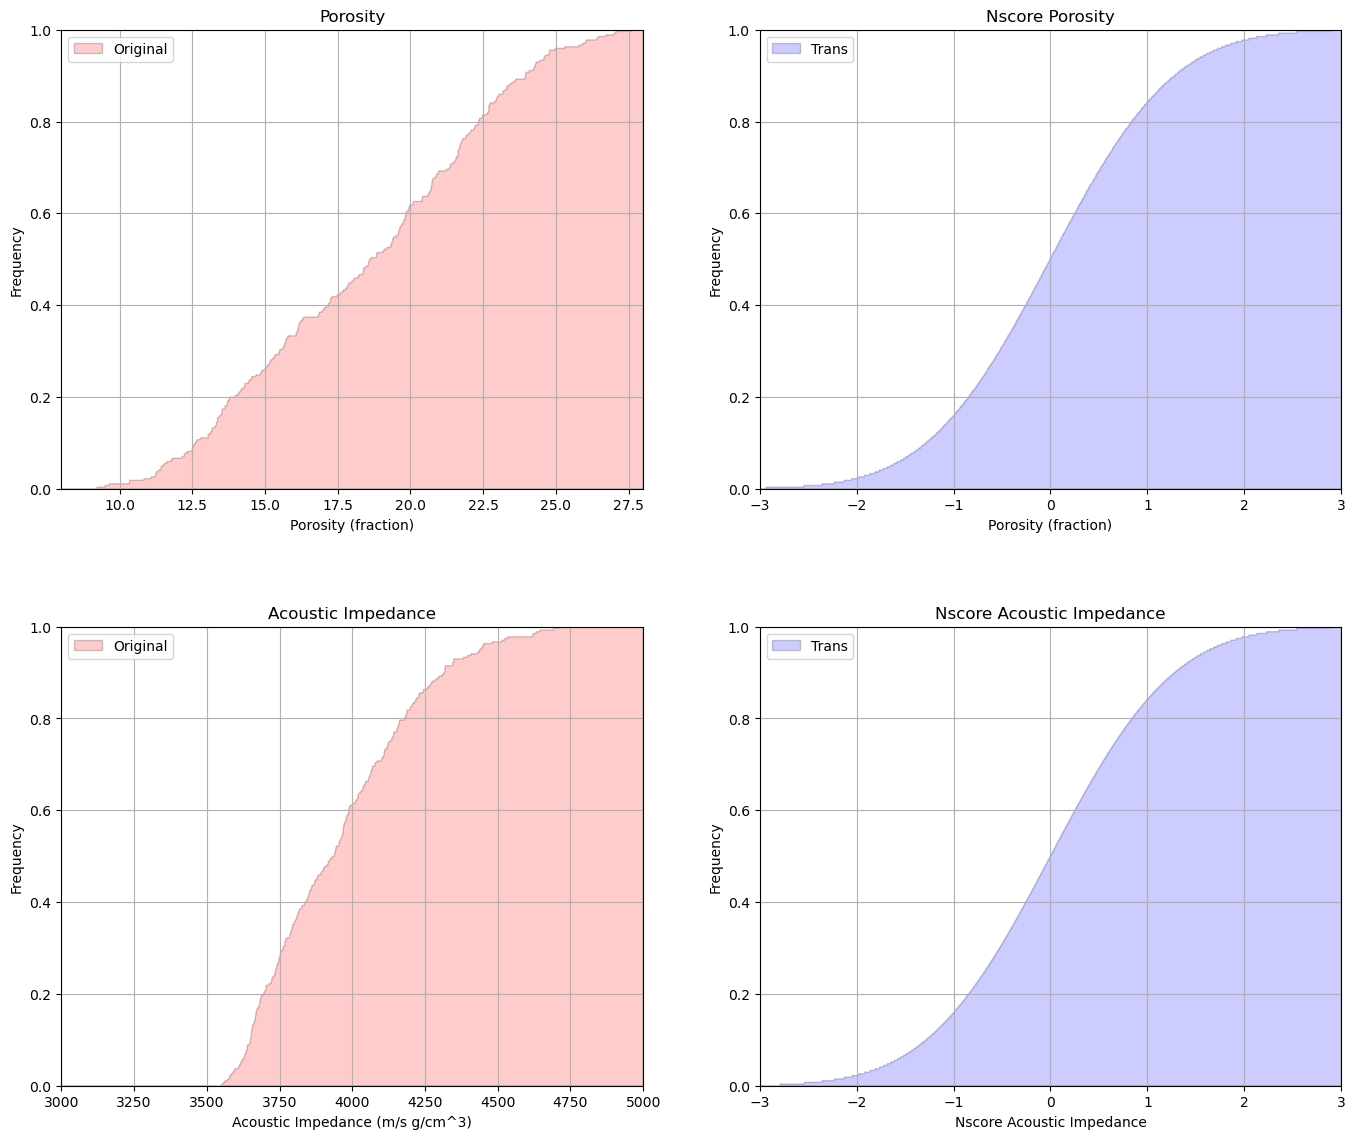

In [72]:
plt.subplot(221)                                       
plt.hist(df['Porosity'], facecolor='red',bins=np.linspace(pormin,pormax,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([pormin,pormax]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(222)  
plt.hist(df['NPor'], facecolor='blue',bins=np.linspace(-3.0,3.0,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label = 'Trans')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Nscore Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(223)                                        # plot nscore transformed sand and shale histograms
plt.hist(df['AI'], facecolor='red',bins=np.linspace(AImin,AImax,10000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([AImin,AImax]); plt.ylim([0,1.0])
plt.xlabel('Acoustic Impedance (m/s g/cm^3)'); plt.ylabel('Frequency'); plt.title('Acoustic Impedance')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(224)                                        # plot nscore transformed sand and shale histograms
plt.hist(df['NAI'], facecolor='blue',bins=np.linspace(-3.0,3.0,10000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label = 'Trans')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('Nscore Acoustic Impedance'); plt.ylabel('Frequency'); plt.title('Nscore Acoustic Impedance')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
plt.show()

The normal score transform has correctly transformed the porosity and acoustic impedence to standard normal.  Now we will transform the acoustic impedance map. 

In [73]:
dfAI = pd.DataFrame({'AI':seismic.flatten()})
dfAI['NAI'], tvAImap, tnsAImap = geostats.nscore(dfAI, 'AI') # nscore transform for all facies porosity 
Nseismic = (dfAI['NAI'].values).reshape((100,100))

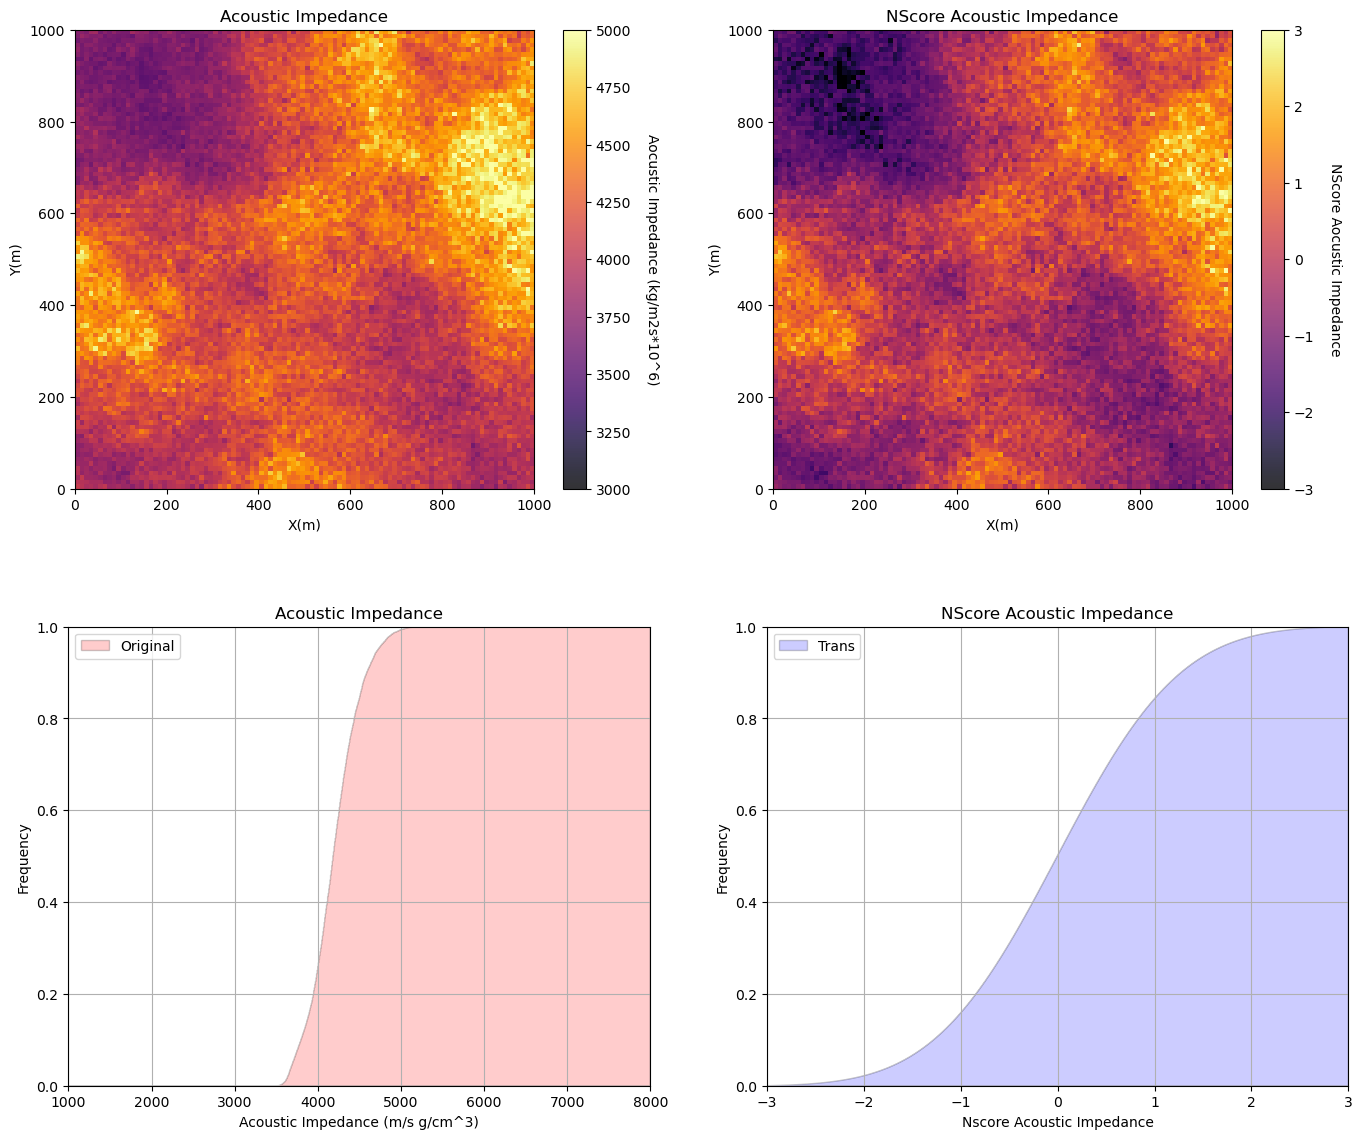

In [76]:
plt.subplot(221) 
GSLIB.pixelplt_st(seismic,xmin,xmax,ymin,ymax,gcsize,AImin,AImax,'Acoustic Impedance','X(m)','Y(m)','Aocustic Impedance (kg/m2s*10^6)',cmap)

plt.subplot(222) 
GSLIB.pixelplt_st(Nseismic,xmin,xmax,ymin,ymax,gcsize,-3,3,'NScore Acoustic Impedance','X(m)','Y(m)','NScore Aocustic Impedance',cmap)

plt.subplot(223)                                        # plot nscore transformed sand and shale histograms
plt.hist(seismic.flatten(), facecolor='red',bins=np.linspace(1000.0,8000.0,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([1000.0,8000.0]); plt.ylim([0,1.0])
plt.xlabel('Acoustic Impedance (m/s g/cm^3)'); plt.ylabel('Frequency'); plt.title('Acoustic Impedance')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(224)                                        # plot nscore transformed sand and shale histograms
plt.hist(Nseismic.flatten(), facecolor='blue',bins=np.linspace(-3.0,3.0,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label = 'Trans')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('Nscore Acoustic Impedance'); plt.ylabel('Frequency'); plt.title('NScore Acoustic Impedance')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
plt.show()

#### Calculate Local Prior Distributions 

We perform simple kriging to calculate the local prior distributions from the porosity well data. For brevity we will assume a variogram model (instead of calculating and modeling the nscore transform porosity variogram).

We will use the simple kriging program translated from GSLIB available in GeostatsPy.  If you get singular matrices errors there are two possible causes:

1. you have multiple spatial data at exactly the same locations
2. you selected ordinary kriging (ktype = 1), this is not currently tested

Two remove duplicate data from a DataFrame you could use this command.

```p
df.drop_duplicates(subset = ['X', 'Y'],keep = 'first', inplace = True) 
```

Use 'subset' to indicate the columns that must match to be considered a duplicated (X and Y looking for the same 2D location), keep='first' to indicate to keep the first occurance and inplace = True to indicate to remove and update the DataFrame. 

Let's check out the parameters required for kriging.

In [77]:
geostats.kb2d

<function geostatspy.geostats.kb2d(df, xcol, ycol, vcol, tmin, tmax, nx, xmn, xsiz, ny, ymn, ysiz, nxdis, nydis, ndmin, ndmax, radius, ktype, skmean, vario)>

We can see the required parameters for kriging include:

* spatial data - DataFrame 'df', x, y and variable columns, 'x', 'y', and 'vcol' 
* triming - min and max value, 'tmin' and 'tmax'
* grid specification - number of cells 'nx' and 'ny', grid origin, 'xmn' and 'ymn' and cell size 'xsiz' and 'ysiz'
* discretication - for block kriging 'nxdis' and 'nydis'
* search limits - minimum and maximum number of data 'ndmin' and 'ndmax' and search radius 'radius'
* kriging type - only tested for simple kriging = '0', simple kriging mean 'skmean'
* variogram model - 'vairo'

We will run the simple kriging method and calculate the required simple kriging estimator, mean $\overline{x}_{prior}$, and kriging variance, variance, $\sigma^2_{prior}(\bf{u})$ for our prior distributions at all locations in the area of interest.  

  Estimated   10000 blocks 
      average   -0.4331406049903795  variance  0.46128579422380944


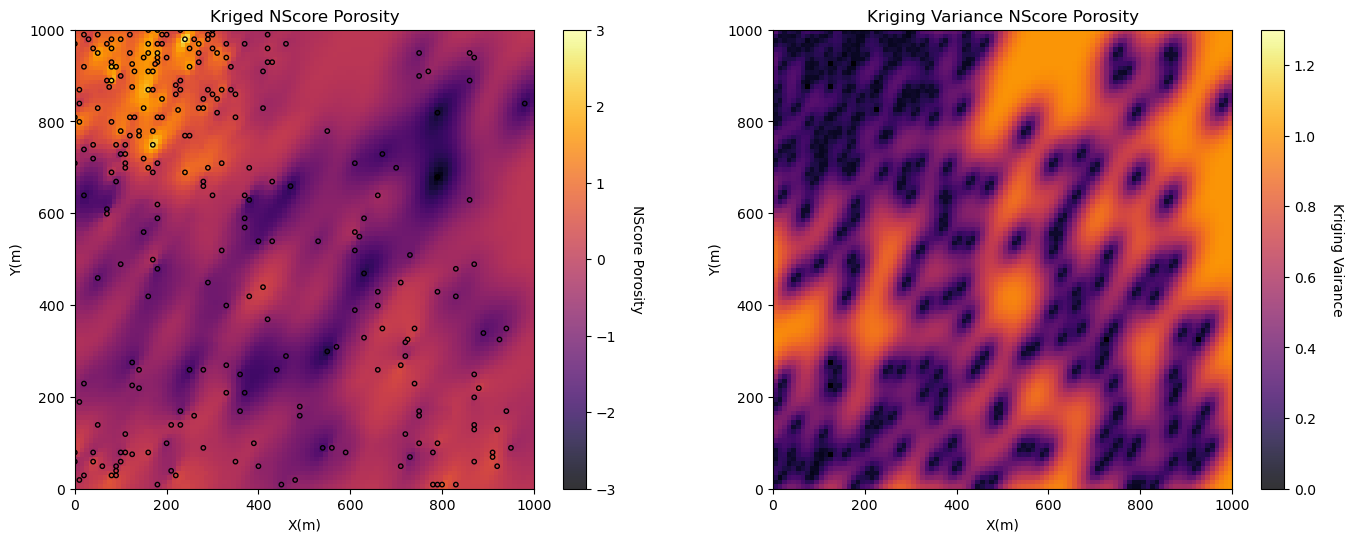

In [91]:
run = True
# Assume a single structure variogram model
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=30,hmaj1=200,hmin1=100) # assumed 1 structure variogram model
# Perform simple kriging 
if run:
    kpor, kvar = geostats.kb2d(df,'X','Y','NPor',tmin=-99,tmax=99,nx=100,xmn=5,xsiz=10,ny=100,ymn=5,ysiz=10,nxdis=1,nydis=1,
                     ndmin=3,ndmax=30,radius=2000,ktype=0,skmean=0.0,vario=vario)
# Plot the results
plt.subplot(221) 
GSLIB.pixelplt_st(kpor,xmin,xmax,ymin,ymax,gcsize,-3,3,'Kriged NScore Porosity','X(m)','Y(m)','NScore Porosity',cmap)
plt.scatter(df['X'],df['Y'],c=df['NPor'],s=10,edgecolor='black',vmin=-3,vmax=3,cmap=cmap)
plt.xlim([xmin,xmax]); plt.xlim([ymin,ymax])

plt.subplot(222) 
GSLIB.pixelplt_st(kvar,xmin,xmax,ymin,ymax,gcsize,0,1.3,'Kriging Variance NScore Porosity','X(m)','Y(m)','Kriging Vairance',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
plt.show()

With the assumption of Gaussianity we now have prior distributions at all locations!

#### Calculate the Local Likelihood Distributions from Secondary Data

For simplicity we will use a single exhaustively sampled secondary variable. We need to formulate the following simple kriging system.

\begin{equation}
C \lambda = D
\end{equation}

and then invert the left side, $C^{-1}$ and multiply by the right side, $D$, to solve for the weights, $\lambda$.

The method in this example is for 1 secondary variable, acoustic impedance, predicting the primary variable, porosity, to formulate $C$ and $D$. It is not difficult to expand this method for multiple secondary variables. Here's an example for 2 secondary variables, assuming nscore acoustic impedance - column 9 and nscore permeability - column 8 and the primary is nscore porosity - column 7: 

```p
left = df.iloc[:,[8,9]].corr().values                 # calculate the left-hand side
print('Left ' + str(left))
right = np.asarray([df.iloc[:,7].corr(df.iloc[:,8]),df.iloc[:,7].corr(df.iloc[:,9])])
print('Right ' + str(right))
```

I will use the same code for all operations on $C$ and $D$ that will be required for multiple secondary data.  So the above replacement should be all that's required. 

First we will calculate the covariance matrix, $C$ (just 1 x 1 for our case) then invert the covariance matrix (trivial for 1x1) to calculate the kriging weights to estimate the primary variable from the secondary variable(s). 

In [92]:
left = df.iloc[:,[7]].corr().values                 # calculate the left-hand side
print('Left ' + str(left))
right = np.asarray([df.iloc[:,8].corr(df.iloc[:,7])])
print('Right ' + str(right))

Left [[1.]]
Right [-0.80573641]


Now let's invert $C$ and apply matrix multiplication for $C^{-1} D$ to solve for $\lambda$.

In [93]:
left_inv = np.linalg.inv(left)
print('Left Inv ' + str(left_inv))
wts = np.matmul(left_inv,right)
print('Weights ' + str(wts))

Left Inv [[1.]]
Weights [-0.80573641]


We can now loop over the grid and calculate the local likelihood distributions at all locations, solving for the multivariate estimate and estimation variance, $\overline{x}_{likelihood}(\bf{u})$ and $\sigma^2_{likelihood}(\bf{u})$

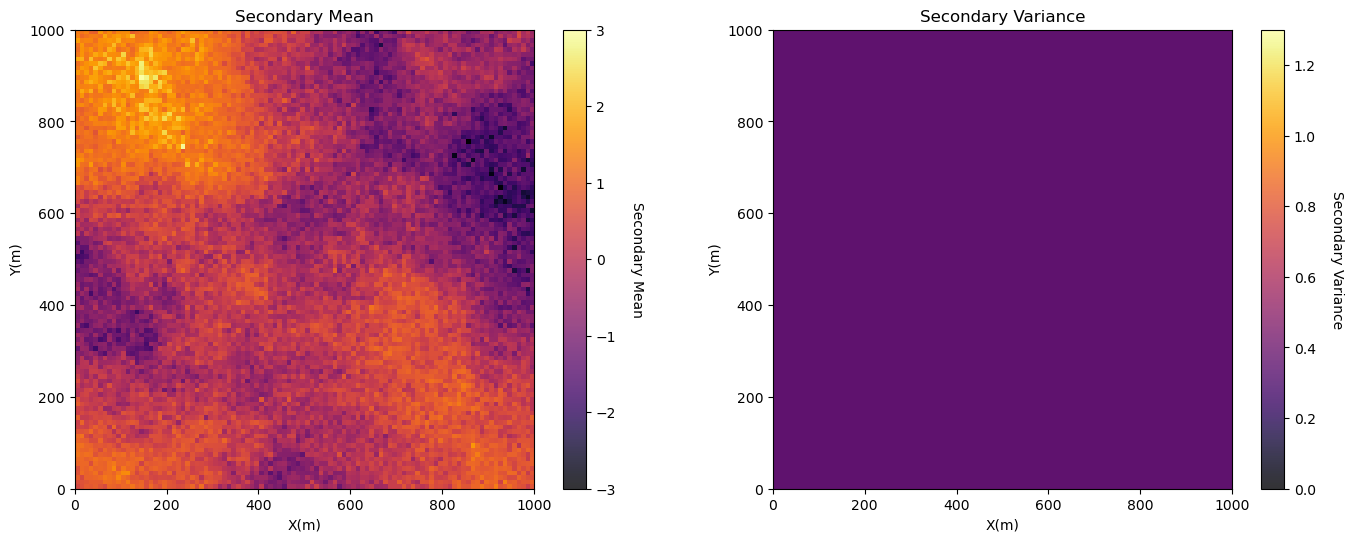

In [94]:
smean = Nseismic * wts[0]
svar = np.full((ny,nx),1.0 - wts[0] * right[0])

plt.subplot(221) 
GSLIB.pixelplt_st(smean,xmin,xmax,ymin,ymax,gcsize,-3,3,'Secondary Mean','X(m)','Y(m)','Secondary Mean',cmap)

plt.subplot(222) 
GSLIB.pixelplt_st(svar,xmin,xmax,ymin,ymax,gcsize,0,1.3,'Secondary Variance','X(m)','Y(m)','Secondary Variance',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
plt.show()

Notice that the secondary variance is constant, $\sigma^2_{likelihood}(\bf{u}) = \sigma^2_{likelihood}$, but the estimate changes locally $\overline{x}_{likelihood}(\bf{u})$? 

That makes sense, since the secondary information provides the same amount of information everywhere. In fact, the entire multivariate workflow assumes multiGaussian which is a homoscedastic distribution. The variance conditional to the estimate is constant!

#### Updating to Calculate the Posterior Distribution

Now we can apply the previously described updating approach, under the assumption of Gaussianity, to calculate the posterior distribution accounting for both porosity data at the wells and the secondary data sources over the entire AOI, our seismic information.

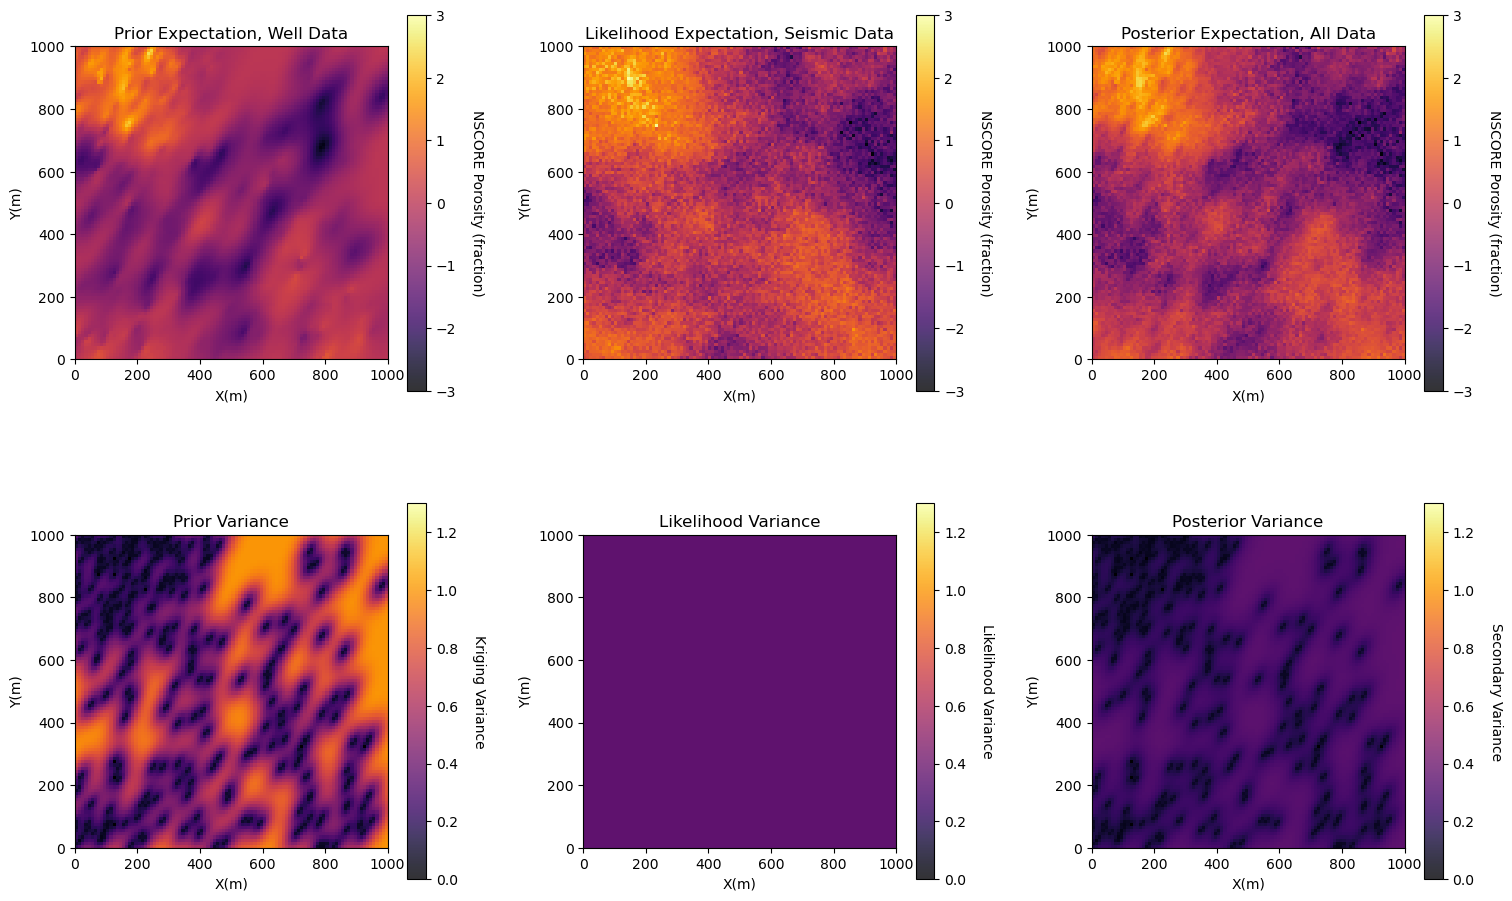

In [101]:
postmean = (smean * kvar + kpor * svar) / ((1-svar)*(kvar-1)+1)
postvar = (kvar*svar)/((1-svar)*(kvar-1)+1) 

plt.subplot(231) 
GSLIB.pixelplt_st(kpor,xmin,xmax,ymin,ymax,gcsize,-3,3,'Prior Expectation, Well Data','X(m)','Y(m)','NSCORE Porosity (fraction)',cmap)

plt.subplot(232) 
GSLIB.pixelplt_st(smean,xmin,xmax,ymin,ymax,gcsize,-3,3,'Likelihood Expectation, Seismic Data','X(m)','Y(m)','NSCORE Porosity (fraction)',cmap)

plt.subplot(233) 
GSLIB.pixelplt_st(postmean,xmin,xmax,ymin,ymax,gcsize,-3,3,'Posterior Expectation, All Data','X(m)','Y(m)','NSCORE Porosity (fraction)',cmap)

plt.subplot(234) 
GSLIB.pixelplt_st(kvar,xmin,xmax,ymin,ymax,gcsize,0,1.3,'Prior Variance','X(m)','Y(m)','Kriging Variance',cmap)

plt.subplot(235) 
GSLIB.pixelplt_st(svar,xmin,xmax,ymin,ymax,gcsize,0,1.3,'Likelihood Variance','X(m)','Y(m)','Likelihood Variance',cmap)

plt.subplot(236) 
GSLIB.pixelplt_st(postvar,xmin,xmax,ymin,ymax,gcsize,0,1.3,'Posterior Variance','X(m)','Y(m)','Secondary Variance',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.8, wspace=0.3, hspace=0.3)
plt.show()

Now we can see the updating of the prior distributions from wells with the secondary distribution (in this case just 1 variable, acoustic impedance) to form a posterior distribution.

Of course, we cannot model with negative porosity! We need to back-transform the posterior porosity values back to the original porosity units.

We can accomplish this with 'backtrans' program translated from GSLIB (coded that just now!). The program expects the input to be a column in a DataFrame so we just have to complete these steps:

1. flatten the porosity posterior mean to convert it from a 2D to a 1D ndarray
2. put it in a DrameFrame
3. back-transform and get a 1D ndarray 
4. reshape to restore the 1d ndarray to a 2D ndarray that we can plot

Note, in the *bracktr* program we will use the original transformation table output from the step were we transform our well porosity values to standard normal.  The other options relate to lower and upper tail assumptions.

In [ ]:
dfpost = pd.DataFrame({'PMean':postmean.flatten()})
bkpost = np.reshape(backtr(dfpost,'PMean',tvPor,tnsPor,zmin=0.05,zmax=0.25,ltail=1,ltpar=0.05,utail=1,utpar=0.25),(100,100))

plt.subplot(121) 
GSLIB.pixelplt_st(postmean,xmin,xmax,ymin,ymax,gcsize,-3,3,'Posterior Mean','X(m)','Y(m)','Posterior Mean',cmap)

plt.subplot(122) 
GSLIB.pixelplt_st(bkpost,xmin,xmax,ymin,ymax,gcsize,pormin,pormax,'Posterior Mean Back Transformed','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

Now we are back in the original porosity units, ranging from 5% to 25%.  We can apply transfer functions to that for volumetrics, flow etc.

Are you surprised by the result? It seems a bit dicontinuous! Why is that? Let's look at the original and nscore porosity CDF's to understand what happened with the back-transform. 

In [ ]:
plt.subplot(121)                                        # plot nscore transformed sand and shale histograms
plt.hist(tvPor, facecolor='blue',bins=np.linspace(0.05,0.25,100000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label = 'Trans')
plt.xlim([0.05,0.25]); plt.ylim([0,1.0])
plt.xlabel('Original Porosity'); plt.ylabel('Cumulative Probability'); plt.title('Original Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(122)                                        # plot nscore transformed sand and shale histograms
plt.hist(tnsPor, facecolor='red',bins=np.linspace(-3,3,100000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([-3.0,3]); plt.ylim([0,1.0])
plt.xlabel('Transformed Porosity'); plt.ylabel('Frequency'); plt.title('NScore Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

The original porosity distribution was bimodal (recall there are two facies), so the back-transform restored this behavoir. 

Note: we have the complete updated distribution of uncertainty in Gaussian space and we only back transformed the mean to get the estimate (the expectation) at each location. We could have back-transformed any percentile, even many of percentiles to describe the entire back-transformed local posterior distribution.  

In our book, Pyrcz and Deutsch (2014), we explain workflow to build realizations with this method, but that is out of scope for this exercise.

#### Comments

This was a basic demonstration of Bayesian updating with a multivariate spatial workflow to integrate secondary information. Much more could be done, including:

1. calculation of the complete distributions of uncertainty (beyond the demonstrated estimate)
2. addition of more secondary variables
3. calculation of stochastic realizations

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
